### PAIR III MÓDULO 3: Correlación y covarianza

Para los ejercicios de Pair hemos utilizado el siguiente dataset: [Spotify Tracks Dataset](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset)

In [13]:
import pandas as pd
import numpy as np
from scipy.stats import skew
from scipy.stats import kurtosistest
from scipy.stats import kstest
from scipy import stats


import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,8)

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

In [14]:
df = pd.read_pickle('data/spotify_songs_limpio.pkl')
df.head(2)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0amhzLwuGALhb81XyyuUlN,Chronic Law,Stay Real,Stay Real,18,196571,False,0.544,0.689,C,-7.764,minor,0.246,0.147,0.0,0.1510,0.422,87.328,compas_4,j-dance
1,3YQ5NYk2legzeloibRyXn1,Marksman,Verified Choppa 2,Verified Choppa 2,58,139093,False,0.725,0.604,G,-5.874,major,0.408,0.117,0.0,0.0855,0.449,199.995,compas_4,dancehall


1. Pregunta teórica: ¿Qué diferencia existe entre la covarianza y la correlación?


Aunque las dos informan de la dirección de la relación entre dos variables, la correlación, además, informa de la intensidad y la covarianza no.

2. Calculad la covarianza y la correlación de nuestro dataset. No nos vale solo con que la calculéis, debéis hacer una interpretación de los resultados obtenidos. Calculad solo la correlación de Pearson.


In [17]:
numericas = df.select_dtypes(np.number)

In [18]:
numericas.cov()

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
popularity,497.981517,1.539180e+04,0.107170,0.006221,5.860151,-0.128063,-0.177354,-0.666440,-0.072642,-0.253334,8.933838
duration_ms,15391.800391,9.675336e+09,-1557.300039,1137.809398,-9300.041398,-724.901110,-3314.242735,3812.960829,345.308935,-4203.350838,8196.836697
danceability,0.107170,-1.557300e+03,0.029315,0.005365,0.220196,0.001601,-0.008943,-0.009829,-0.004630,0.021181,-0.227907
energy,0.006221,1.137809e+03,0.005365,0.063017,0.959000,0.004163,-0.061011,-0.013811,0.009512,0.016123,1.886065
loudness,5.860151,-9.300041e+03,0.220196,0.959000,25.066053,0.034788,-0.976486,-0.650393,0.079698,0.352148,32.781967
speechiness,-0.128063,-7.249011e+02,0.001601,0.004163,0.034788,0.012412,0.000514,-0.003114,0.004837,0.000918,0.096316
acousticness,-0.177354,-3.314243e+03,-0.008943,-0.061011,-0.976486,0.000514,0.111032,0.008944,-0.001467,-0.008019,-2.165624
instrumentalness,-0.666440,3.812961e+03,-0.009829,-0.013811,-0.650393,-0.003114,0.008944,0.094135,-0.005482,-0.025613,-0.464242
liveness,-0.072642,3.453089e+02,-0.004630,0.009512,0.079698,0.004837,-0.001467,-0.005482,0.037823,0.000912,-0.043200
valence,-0.253334,-4.203351e+03,0.021181,0.016123,0.352148,0.000918,-0.008019,-0.025613,0.000912,0.066834,0.573773


In [19]:
numericas.corr()

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
popularity,1.000000,0.007012,0.028049,0.001110,0.052452,-0.051510,-0.023851,-0.097337,-0.016738,-0.043912,0.013466
duration_ms,0.007012,1.000000,-0.092468,0.046079,-0.018885,-0.066149,-0.101118,0.126344,0.018051,-0.165297,0.002803
danceability,0.028049,-0.092468,1.000000,0.124825,0.256874,0.083932,-0.156758,-0.187110,-0.139044,0.478524,-0.044774
energy,0.001110,0.046079,0.124825,1.000000,0.763036,0.148868,-0.729374,-0.179314,0.194834,0.248444,0.252719
loudness,0.052452,-0.018885,0.256874,0.763036,1.000000,0.062367,-0.585327,-0.423406,0.081851,0.272072,0.220244
speechiness,-0.051510,-0.066149,0.083932,0.148868,0.062367,1.000000,0.013851,-0.091102,0.223226,0.031863,0.029079
acousticness,-0.023851,-0.101118,-0.156758,-0.729374,-0.585327,0.013851,1.000000,0.087487,-0.022642,-0.093094,-0.218610
instrumentalness,-0.097337,0.126344,-0.187110,-0.179314,-0.423406,-0.091102,0.087487,1.000000,-0.091865,-0.322914,-0.050896
liveness,-0.016738,0.018051,-0.139044,0.194834,0.081851,0.223226,-0.022642,-0.091865,1.000000,0.018133,-0.007472
valence,-0.043912,-0.165297,0.478524,0.248444,0.272072,0.031863,-0.093094,-0.322914,0.018133,1.000000,0.074654


En estos dos casos, aunque los valores difieren entre la covarianza y la correlación, en los dos casos, sí que coinciden los valores positivos y negativos. Por centrarnos en nuestra variable respuesta [popularity], encontramos que:
- Analizando la covarianza, "popularity":
    - tendría relación negativa con: "speechiness", "acousticness", "instrumentalness", "liveness" y "valance".
    - tendría relación positiva con: "duration_ms","danceability", "energy" "loudness" y "tempo".
- Sin embargo, tiene muy poca correlación en todas las variables.

3. Con los resultados de la correlación del ejercicio anterior, cread un heatmap.
4. Guardad la gráfica del heatmap.


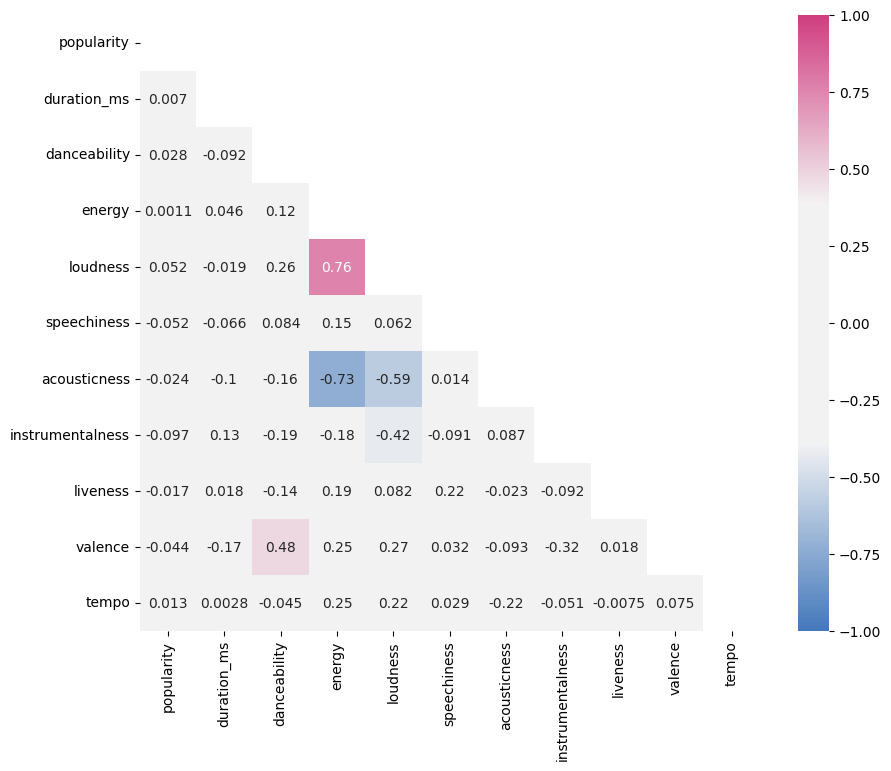

In [20]:
mask = np.triu(np.ones_like(numericas.corr(), dtype = np.bool_))

cmap = sns.diverging_palette(250, 349, sep=100, as_cmap=True)

sns.heatmap(numericas.corr(), 
           cmap = cmap, 
            mask = mask,
           annot = True,
           vmin= -1,
           vmax= 1)

plt.savefig('heatmap.png');